In [145]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
from scipy import stats
from itertools import product as prod
%load_ext autoreload
%autoreload 2

from constants_of_experiments import *
from noise_models_and_integration import *

nb_epochs 60000
learning_rate 0.0001
size_of_lrs [200, 300, 400]
batch_size 10
gamma=0.2

alpha=0.0

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [68]:
dictionary = np.load("results/eff_fid_lstm/dim_2x1/PLG_50_100tys/statistic_aSxbSy_id_spinChain_dim_2x1.npz")["arr_0"][()]
dictionary['gamma0.8_alpha0.0'] = dictionary['gamma0.8_alpha0.']
dictionary['gamma0.6_alpha0.0'] = dictionary['gamma0.6_alpha0.']
del dictionary['gamma0.8_alpha0.']
del dictionary['gamma0.6_alpha0.']

In [69]:

print(dictionary)
iterat = 0
for gamma in [0.6,0.8]:
    for alpha in [0.,0.2,0.5,0.8]:
        print("gamma ",gamma)
        print("alpha ", alpha)
        data0 = np.load("results/eff_fid_lstm/dim_{}/PLG_50_100tys/statistic_{}_gam_{}_alpha_{}_{}.npz".format(model_dim,
                                                                                           noise_name,
                                                                                           gamma,
                                                                                           alpha, int(iterat)))["arr_0"][()]
        data100 = np.load("results/eff_fid_lstm/dim_{}/PLG_50_100tys/statistic_{}_gam_{}_alpha_{}_{}.npz".format(model_dim,
                                                                                           noise_name,
                                                                                           gamma,
                                                                                           alpha, int(iterat+100)))["arr_0"][()]
        data200 = np.load("results/eff_fid_lstm/dim_{}/PLG_50_100tys/statistic_{}_gam_{}_alpha_{}_{}.npz".format(model_dim,
                                                                                           noise_name,
                                                                                           gamma,
                                                                                           alpha, iterat+200))["arr_0"][()]
        dictionary["gamma{}_alpha{}".format(gamma,alpha)].append(data0[0][0])
        dictionary["gamma{}_alpha{}".format(gamma,alpha)].append(data100[0][0])
        dictionary["gamma{}_alpha{}".format(gamma,alpha)].append(data200[0][0])
        
        iterat+=1
        print(data0[0][0])

{'gamma0.8_alpha0.0': [0.96, 0.97, 0.96], 'gamma0.6_alpha0.0': [0.94, 0.96, 0.94], 'gamma0.6_alpha0.2': [0.98, 0.98, 0.96], 'gamma0.8_alpha0.5': [0.9, 0.99, 0.99], 'gamma0.6_alpha0.5': [0.99, 0.99, 0.99], 'gamma0.6_alpha0.8': [0.99, 0.98, 0.98], 'gamma0.8_alpha0.8': [0.99, 0.99, 0.99], 'gamma0.8_alpha0.2': [0.98, 0.98, 0.98]}
gamma  0.6
alpha  0.0
0.9619728
gamma  0.6
alpha  0.2
0.96604335
gamma  0.6
alpha  0.5
0.9885367
gamma  0.6
alpha  0.8
0.9888214
gamma  0.8
alpha  0.0
0.9717829
gamma  0.8
alpha  0.2
0.97772264
gamma  0.8
alpha  0.5
0.99072057
gamma  0.8
alpha  0.8
0.9915163


In [75]:
for gamma in [0.6,0.8]:
    for alpha in [0.,0.2,0.5,0.8]:
        print("gamma ",gamma)
        print("alpha ", alpha)
        print(np.mean(dictionary["gamma{}_alpha{}".format(gamma,alpha)]))

gamma  0.6
alpha  0.0
0.9509780351320902
gamma  0.6
alpha  0.2
0.9734388065338134
gamma  0.6
alpha  0.5
0.9892206839720408
gamma  0.6
alpha  0.8
0.9865614394346873
gamma  0.8
alpha  0.0
0.9693977161248525
gamma  0.8
alpha  0.2
0.9709230665365854
gamma  0.8
alpha  0.5
0.9752432413895925
gamma  0.8
alpha  0.8
0.9909477384885151


In [44]:
params_list = [(0.6,0.,1.),(0.6,0.1,0.8),(0.6,0.1,0.6),(0.6,0.2,0.6),(0.6,0.3,0.6),
                   (0.8,0.,1.),(0.8,0.1,0.8),(0.8,0.1,0.6),(0.8,0.2,0.6),(0.8,0.3,0.6)]
for params in params_list:
    gamma,alpha,beta = params
    print(gamma)
    print(alpha)
    print(beta)
    print(noise_name)
#         data = np.load("results/eff_fid_lstm/dim_{}/statistic_{}_gam_{}_alpha_{}.npz".format(model_dim,
#                                                                                              noise_name,
#                                                                                              gamma,
#                                                                                              alpha))['arr_0']
#     data = np.load("results/eff_fid_lstm/dim_{}/PLG_tr8k_ts4k_60tys_iter/statistic_{}_gam_{}_alpha_{}_beta_{}.npz".format(model_dim,
#                                                                                              noise_name,
#                                                                                              gamma,
#                                                                                              alpha,beta))['arr_0']
    data = np.load(
        "results/eff_fid_lstm/dim_{}/PLG_final_batch_10_50tys_8k_to_4k/statistic_spinChainDrift_spinChain_dim_2x1_gam_{}_alpha_{}_beta_{}.npz".format(model_dim,
                                                                                         gamma,
                                                                                         alpha,
                                                                                         beta))['arr_0']
    data2 = np.load(
        "results/eff_fid_lstm/dim_{}/PLG_final_batch_10_50tys_8k_to_4k/statistic2_spinChainDrift_spinChain_dim_2x1_gam_{}_alpha_{}_beta_{}.npz".format(model_dim,
                                                                                         gamma,
                                                                                         alpha,
                                                                                         beta))['arr_0']

    data = data[()]
    a = []
    
    for i in range(len(data)):
#         print(list(data[i])[0])
        a.append(list(data[i])[0])
    data2 = data2[()]
#     print(data2)
    for i in range(len(data2)):
#         print(list(data2[i])[0])
        a.append(list(data2[i])[0])
    print(np.mean(a))

0.6
0.0
1.0
aSxbSy_id_spinChain_dim_2x1
0.97886056
0.6
0.1
0.8
aSxbSy_id_spinChain_dim_2x1
0.97887844
0.6
0.1
0.6
aSxbSy_id_spinChain_dim_2x1
0.9812311
0.6
0.2
0.6
aSxbSy_id_spinChain_dim_2x1
0.9557622
0.6
0.3
0.6
aSxbSy_id_spinChain_dim_2x1
0.97750616
0.8
0.0
1.0
aSxbSy_id_spinChain_dim_2x1
0.90486413
0.8
0.1
0.8
aSxbSy_id_spinChain_dim_2x1
0.9841345
0.8
0.1
0.6
aSxbSy_id_spinChain_dim_2x1
0.97732115
0.8
0.2
0.6
aSxbSy_id_spinChain_dim_2x1
0.97354627
0.8
0.3
0.6
aSxbSy_id_spinChain_dim_2x1
0.97896427


In [40]:
params_list = [(0.6,0.),(0.6,0.2)]
for params in params_list:
    gamma,alpha = params
    print(gamma)
    print(alpha)
    print(noise_name)
    data = np.load("results/eff_fid_lstm/dim_{}/stretch_batch50_100tys/statistic_{}_gam_{}_alpha_{}.npz".format(model_dim,
                                                                                             noise_name,
                                                                                             gamma,
                                                                                             alpha))['arr_0']


    data = data[()]
    a = []
#     print(data)
    for i in range(len(data)):
        print(list(data[i])[0])
        a.append(list(data[i])[0])
    print(np.mean,(a))

0.6
0.0
aSxbSy_id_spinChain_dim_2x1
0.929525
0.95366395
0.95160675
0.93236196
0.95506155
0.96455604
0.96338636
0.9500231
0.6
0.2
aSxbSy_id_spinChain_dim_2x1
0.96862584
0.9710865
0.9670774
0.96892995


In [172]:
# dane = np.load("results/NN_as_approx/dim_{}/stretch/{}_gam_{}_alpha_{}_epsilon_1e-{}.npz".format(model_dim,
#                                                                                         noise_name,
#                                                                                         gamma,
#                                                                                         alpha,
#                                                                                         eps_order))["arr_0"]

# dane_rev = np.load("results/NN_as_approx/dim_{}/stretch/{}_reversed_gam_{}_alpha_{}_epsilon_1e-{}.npz".format(model_dim,
#                                                                                         noise_name,
#                                                                                         gamma,
#                                                                                         alpha,
#                                                                                         eps_order))["arr_0"]

dane_rev = np.load("results/NN_as_approx/qutip/dim_{}/{}_gam_{}_alpha_{}_epsilon_1e-{}.npz".format(model_dim,
                                                                                        noise_name,
                                                                                        gamma,
                                                                                        alpha,
                                                                                        eps_order))["arr_0"]

dane = np.load("results/NN_as_approx/qutip/stretch/{}_reversed_gam_{}_alpha_{}_epsilon_1e-{}.npz".format(
                                                                                        noise_name,
                                                                                        gamma,
                                                                                        alpha,
                                                                                        eps_order))["arr_0"]
# print(dane)
# print(dane_rev)
dane = np.concatenate((dane,dane_rev),axis=2)
np.shape(dane)

(32, 2, 2500)

In [173]:
def sieve_data(data):   
    tmpdata = []
    for i in range(np.shape(data)[2]):
        if not((data[:,:,i] <0).any()) and (data[:,:,i] >0).any():
            tmpdata.append(data[:,:,i])

    print(len(tmpdata))
    data = np.zeros((np.shape(data)[0],np.shape(data)[1],len(tmpdata)))
    for i in range(len(tmpdata)):
        data[:,:,i] = tmpdata[i]
    return data

data = sieve_data(dane)

456


In [174]:
data[2,0]-data[31,1]

array([-1.15037126e-01, -3.15511528e-02,  3.42568188e-02, -2.80410067e-01,
        3.79908734e-01, -2.21027141e-01, -8.07595270e-02, -2.42670588e-01,
       -2.68328365e-01, -3.60111971e-01,  3.95289445e-03, -2.05431049e-01,
       -1.28801888e-01, -2.04321686e-01, -2.05162373e-01, -4.63367687e-01,
       -1.76647786e-01, -2.48655965e-01, -2.03828155e-01, -3.05482203e-01,
       -4.88976863e-01, -1.72312436e-01, -2.18385147e-01,  4.75421276e-01,
       -1.82389603e-01, -3.00313385e-01, -2.68756208e-01, -7.84793301e-02,
       -2.19955908e-01, -1.70026452e-01, -2.88503770e-01, -1.27462619e-01,
        3.65021122e-01,  2.14035112e-01,  2.23634124e-02, -5.10903242e-01,
       -1.62645223e-01, -3.59152669e-01, -3.73340879e-02, -5.11113925e-01,
       -3.74656475e-01, -1.37152916e-01, -2.28452541e-01, -8.86728634e-02,
       -3.17148888e-01, -3.58037442e-01, -1.51475297e-01, -1.69708616e-01,
       -1.14246364e+00, -3.98036757e-03, -8.45933092e-02,  6.04443478e-02,
       -2.77797817e-01, -

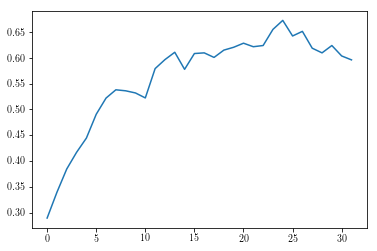

In [175]:
plt.plot([np.mean(data[i,1]) for i in range(32)])
plt.show()

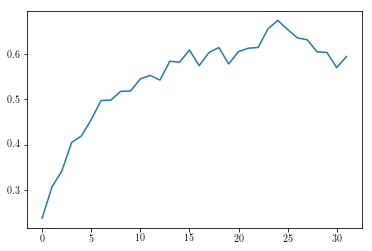

In [176]:
plt.plot([np.mean(data[i,0]) for i in range(32)])
plt.show()

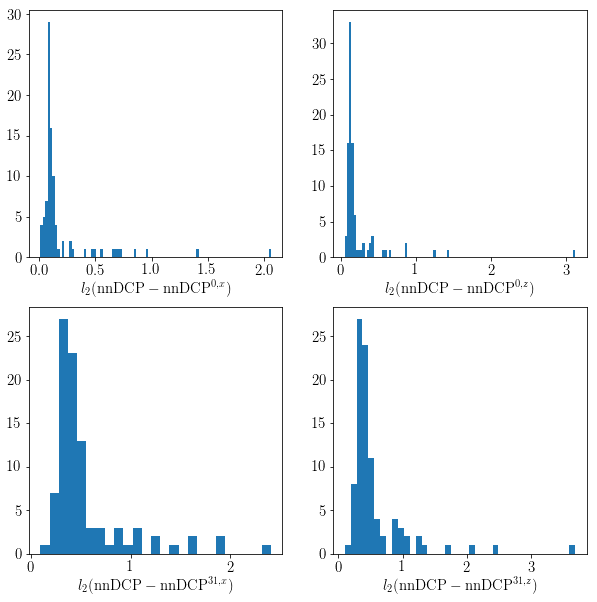

In [157]:
plt.rc("text", usetex=True)
my_font_size = 15
#PyPlot.rc("font", family="serif")

plt.rc("text.latex", unicode=True)
fig = plt.figure()
fig.set_size_inches(10, 10)



plt.subplot(2,2,1)
plt.hist(data[0,0], bins='auto')  
plt.tick_params(labelsize = my_font_size)
plt.xlabel(r'$l_2(\textrm{nnDCP}-\textrm{nnDCP}^{0,x})$', fontsize=my_font_size)

plt.subplot(2,2,2)
plt.hist(data[0,1], bins='auto')  
plt.tick_params(labelsize = my_font_size)
plt.xlabel(r'$l_2(\textrm{nnDCP}-\textrm{nnDCP}^{0,z})$', fontsize=my_font_size)

plt.subplot(2,2,3)
plt.hist(data[31,0], bins='auto')  
plt.tick_params(labelsize = my_font_size)
plt.xlabel(r'$l_2(\textrm{nnDCP}-\textrm{nnDCP}^{31,x})$', fontsize=my_font_size)

plt.subplot(2,2,4)
plt.hist(data[31,1], bins='auto')  
plt.tick_params(labelsize = my_font_size)
plt.xlabel(r'$l_2(\textrm{nnDCP}-\textrm{nnDCP}^{31,z})$', fontsize=my_font_size)
# plt.savefig("../txt/LSTM_approx/histograms_{}_eps_e-{}.pdf".format(noise_name,eps_order))
plt.show()

In [177]:
kruskal = np.zeros((64,64))
for i,j in prod(range(n_ts),range(n_ts)):
    for k,l in prod([0,1],[0,1]):
        kruskal[i+k*32,j+l*32] = stats.kruskal(data[i,k],data[j,l])[1]

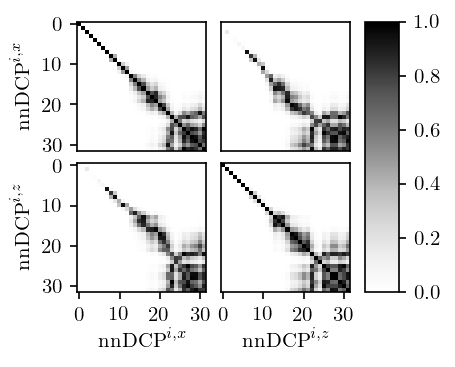

In [178]:
plt.rc("text", usetex=True)
my_font_size =10
#PyPlot.rc("font", family="serif")

my_cmap = plt.cm.Greys

plt.rc("text.latex", unicode=True)
fig = plt.figure(dpi=150)
fig.set_size_inches(3 ,3)
plt.subplot(2,2,1)
plt.imshow(kruskal[:32,:32], interpolation='nearest', cmap=my_cmap, vmin=0, vmax=1)
plt.ylabel(r'$ \textrm{nnDCP}^{i,x}$', fontsize=my_font_size)
plt.tick_params(labelsize = my_font_size)
plt.xticks([])
plt.yticks([0,10,20,30])
plt.subplot(2,2,2)
plt.imshow(kruskal[:32,32:], interpolation='nearest', cmap=my_cmap, vmin=0, vmax=1)
plt.xticks([])
plt.yticks([])
plt.subplot(2,2,3)
plt.imshow(kruskal[32:,:32], interpolation='nearest', cmap=my_cmap, vmin=0, vmax=1)
plt.ylabel(r'$ \textrm{nnDCP}^{i,z}$', fontsize=my_font_size)
plt.xlabel(r'$ \textrm{nnDCP}^{i,x}$', fontsize=my_font_size)
plt.tick_params(labelsize = my_font_size)
plt.yticks([0,10,20,30])
plt.xticks([0,10,20,30])
plt.subplot(2,2,4)
plt.imshow(kruskal[32:,32:], interpolation='nearest', cmap=my_cmap, vmin=0, vmax=1)
plt.subplots_adjust(hspace=0.1)
plt.subplots_adjust(wspace=-0.1)
plt.xlabel(r'$\textrm{nnDCP}^{i,z}$', fontsize=my_font_size)
plt.tick_params(labelsize = my_font_size)
plt.yticks([])
plt.xticks([0,10,20,30])
plt.subplots_adjust(bottom=0.2, right=0.8, top=0.8)
cax = plt.axes([0.8, 0.2, 0.075, 0.6])
plt.tick_params(labelsize = my_font_size)
c = plt.colorbar(cax=cax)
# c.set_label(r'$p$--\textrm{value}', fontsize=my_font_size,rotation=270)

# plt.savefig("../txt/LSTM_approx/kruskal_mtx_plot_{}_eps_e-{}.pdf".format(noise_name,eps_order))
plt.show()